In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".6"})

d1=pd.read_csv("final Nicky Morgan.csv",encoding="latin1")
d1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,...,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,classofspeech,month
0,0,1703,1703,Rhiskiboi91,RÃÂÃÂ­an ÃÂÃÂ' Catharnaigh ÃÂ°ÃÂÃÂ...,333098431,1139278652401770496,/Rhiskiboi91/status/1139278652401770496,2019-06-13 21:09:32,1560460172,...,NaN,2,0,0,False,True,1.139135e+18,"[{'screen_name': 'ainefromderry', 'user_id': '...",neither,6
1,1,5449,5449,eliesian,Iain Lees,769802145726132224,1174627552964546562,/eliesian/status/1174627552964546562,2019-09-19 10:13:26,1568888006,...,NaN,0,0,0,False,False,NaN,[],neither,9
2,2,5058,5058,Theatremusing,Theatremusings,719706176649342977,1154373272403927040,/Theatremusing/status/1154373272403927040,2019-07-25 12:50:10,1564059010,...,NaN,0,0,0,False,False,NaN,[],neither,7
3,3,1149,1149,dianas_house,Diane House Woodcock,22316199,1123989924431257602,/dianas_house/status/1123989924431257602,2019-05-02 16:37:35,1556815055,...,NaN,0,1,0,False,False,NaN,[],neither,5
4,4,432,432,PennoftheNth,penny,1072947262781882368,1156793825567920128,/PennoftheNth/status/1156793825567920128,2019-08-01 05:08:34,1564636114,...,NaN,0,0,0,False,False,NaN,[],neither,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,2496,1113,1113,Chester66666666,ChesterCharlie6 Red #FBPE,1399929349,1125282960469630976,/Chester66666666/status/1125282960469630976,2019-05-06 06:15:39,1557123339,...,NaN,1,1,0,False,True,1.125045e+18,"[{'screen_name': 'lazaroumterror', 'user_id': ...",neither,5
2497,2497,3340,3340,oliviawood0706,hopeinthefuture,1853730362,1189662771228659712,/oliviawood0706/status/1189662771228659712,2019-10-30 21:58:02,1572472682,...,NaN,0,0,0,False,True,1.189638e+18,"[{'screen_name': 'BrexitBetrayed', 'user_id': ...",neither,10
2498,2498,1552,1552,Tonyhd16,Tonyhd,1070714172726501377,1131232280905691136,/Tonyhd16/status/1131232280905691136,2019-05-22 16:16:07,1558541767,...,NaN,1,0,0,False,True,1.131231e+18,"[{'screen_name': 'bbclaurak', 'user_id': '6118...",neither,5
2499,2499,5337,5337,craftybookworm,Nicola ÃÂ¢ÃÂÃÂ,30026482,1175890233046568960,/craftybookworm/status/1175890233046568960,2019-09-22 21:50:53,1569189053,...,NaN,1,0,0,False,False,NaN,[],offensive_language,9


In [2]:
b1z=d1.groupby('month',sort=True)['classofspeech'].count()
b1z

month
5     273
6     316
7     337
8     181
9     630
10    764
Name: classofspeech, dtype: int64

In [3]:
d1['classofspeech'].unique()

array(['neither', 'offensive_language'], dtype=object)

In [4]:
o1=d1[d1['classofspeech']=='hate_speech'].groupby('month',sort=True).count()
o1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,...,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,classofspeech
month,,,,,,,,,,,,,,,,,,,,,


In [5]:
o2=d1[d1['classofspeech']=='offensive_language']
l=len(o2)
abusers=[]
for i in range(l):
    #haters.append(o2.loc[o2.classofspeech=='hate_speech','username'].values[i])
    abusers.append(o2.loc[o2.classofspeech=='offensive_language','screen_name'].values[i])
    #print (o2.loc[o2.classofspeech=='hate_speech','username'].values[i])
abusers


['DaveJH4',
 'coone_michael',
 'lauran1902',
 'steven_t_green',
 'richardSuncarr',
 'DGAll41',
 'RachelG21879460',
 'Smartyman',
 'GillW1220',
 'Della631',
 'YesYes2Yes',
 'nevetssnilloc',
 '67Snowy',
 'richardyjones',
 'Box_Boy99',
 'theparkerilla',
 'RawdonCrozier',
 'BagladyM',
 'gpratt21',
 'LondonEconomic',
 'peterpalmer901',
 'DavidL1980',
 'geoffreyMyers1',
 'george19a',
 'RJMrgn',
 'goldfinchgazer',
 'Erwhatdidyousay',
 'AuntyLush',
 'FidelCuntstruck',
 'NickyMorgan__',
 'nickcorston',
 'YourFriendZippy',
 'peterpalmer901',
 'CarolineCreator',
 'Hargraver',
 'LeftLeftfooter',
 'Pibasedlifeform',
 'christill',
 'MarkWelshpool',
 'Patrick10599096',
 'BSAboarding',
 'harrisimo',
 'guyevan29068996',
 'harrisimo',
 'StMichael888',
 'LandanTownRyan',
 'akazeeox',
 'Mr_NG_Photo',
 'AleexxJP',
 'philiparrogers',
 'Coops_tv',
 'Jayphex303',
 'mulsah1978',
 'WxmJackoLa',
 'BeatsSurrender',
 'StuartDPlunkett',
 'FrenchyStu',
 'MCarrielies',
 'MichaelKirkbri5',
 'wardmajor',
 'garymca66',


In [6]:

dis=set()
for i in abusers:
    count=0
    for j in o2['screen_name']:
    
        if i==j:
           count+=1 
        if count==2:
            dis.add(j)
            print (count,j)
dis            

2 peterpalmer901
2 CarolineCreator
2 Hargraver
2 LeftLeftfooter
2 Pibasedlifeform
2 christill
2 MarkWelshpool
2 Patrick10599096
2 BSAboarding
2 harrisimo
2 guyevan29068996
2 harrisimo
2 StMichael888
2 LandanTownRyan
2 akazeeox
2 Mr_NG_Photo
2 AleexxJP
2 philiparrogers
2 Coops_tv
2 Jayphex303
2 mulsah1978
2 WxmJackoLa
2 BeatsSurrender
2 StuartDPlunkett
2 FrenchyStu
2 MCarrielies
2 MichaelKirkbri5
2 wardmajor
2 garymca66
2 mrneilmorrow
2 lilyk1000
2 Magman55
2 RtHonTwatness
2 namaste66ahimsa
2 Juliaarthur8
2 richiecarey35
2 Kat_Says_Stuff
2 stillbestest
2 BUDDHA_DRAGON1
2 ibrook1
2 PederDray
2 DilynThe
2 180_180_141
2 thetree_man
2 MCarrielies
2 _Harry_Brennan_
2 rosskcameron
2 mashleybrown
2 Annette1Hardy
2 MarianSwetman
2 Sportydoodle
2 lancastrian99
2 pchallinor
2 StuartWelsh4
2 Hayes3344
2 SuffolkCoastLab
2 DistilledWill
2 joelashbridge
2 GRALambo
2 poolton_portia
2 steve_hawkes
2 Michex69
2 LandanTownRyan
2 namaste66ahimsa
2 Youth4ia
2 Bobbiej90572948
2 Rock_1878
2 MCarrielies
2 Ant

2 peterpalmer901
2 sarah_stook
2 DavidMagicsmith
2 TQGEssex
2 MCarrielies
2 stephentrew
2 the_middle_bit
2 duduschka
2 BryceBealey
2 ZeleikaRobinson
2 kristal04416575
2 PassionateDave
2 OliviaQuim
2 NDoomster
2 janie_pb
2 EPisstaker
2 HennessyKesewa
2 MsFinalSay
2 MilitantlyA
2 PointlessBrexit
2 sylviadavis551
2 joelashbridge
2 LM_Marlow
2 wordfalcon
2 180_180_141
2 legalolder
2 chaplin_ray
2 RobVanderpere
2 BigG0dfrey
2 CarrollJackie99
2 GrantLewis1
2 TheLastPersont2
2 benjamincohen
2 Cat_n_Bagpipes
2 bob_euro
2 LindaLeather19
2 Pongo81575019
2 SwinsonBrian
2 grahphil
2 33mate33
2 cdeaker
2 Pongo81575019
2 KittyLaing
2 nicransome
2 Daniel252525
2 d_knotty
2 Paul_Crowson
2 StuartBudd1
2 DawnieR2
2 ASK_des
2 DrRiart
2 stevebrookstein
2 DylanBrownie1
2 VernonBriscoe
2 CharlieParish1
2 GilesMacDonogh
2 TrevorRudge1
2 craftybookworm
2 namaste66ahimsa
2 Youth4ia
2 Bobbiej90572948
2 Rock_1878
2 MCarrielies
2 AnthonyStanbury
2 dontreallyuse79
2 orangeorangeboy
2 Lokster71
2 ffiniol14
2 PUPart

{'180_180_141',
 '33mate33',
 'ASK_des',
 'AleexxJP',
 'Annette1Hardy',
 'AnthonyStanbury',
 'Athena6931',
 'BSAboarding',
 'BUDDHA_DRAGON1',
 'BeatsSurrender',
 'BigG0dfrey',
 'Bobbiej90572948',
 'BridgeeCee',
 'BryceBealey',
 'CarolineCreator',
 'CarrollJackie99',
 'Cat_n_Bagpipes',
 'CharlieParish1',
 'Coops_tv',
 'Daniel252525',
 'DavidMagicsmith',
 'DawnieR2',
 'DilynThe',
 'DistilledWill',
 'DrRiart',
 'DylanBrownie1',
 'EPisstaker',
 'Farrel_Raven',
 'FrenchyStu',
 'GRALambo',
 'GilesMacDonogh',
 'GrantLewis1',
 'Hargraver',
 'Hayes3344',
 'HennessyKesewa',
 'IconoDesignUK',
 'Jayphex303',
 'Juliaarthur8',
 'Kat_Says_Stuff',
 'KittyLaing',
 'LM_Marlow',
 'LadyZaichik',
 'LandanTownRyan',
 'LeftLeftfooter',
 'LindaLeather19',
 'Lokster71',
 'MCarrielies',
 'Magman55',
 'MarianSwetman',
 'MarkWelshpool',
 'MichaelKirkbri5',
 'Michex69',
 'MilitantlyA',
 'Mr_NG_Photo',
 'MsFinalSay',
 'MsTropey',
 'NDoomster',
 'Nat__Wil',
 'OliviaQuim',
 'PUPartyUK',
 'PassionateDave',
 'Patrick10

In [7]:
o=d1[d1['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,...,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,classofspeech
month,,,,,,,,,,,,,,,,,,,,,
5,8,8,8,8,8,8,8,8,8,8,...,8,0,8,8,8,8,8,4,8,8
6,23,23,23,23,23,23,23,23,23,23,...,23,0,23,23,23,23,23,2,23,23
7,23,23,23,23,23,23,23,23,23,23,...,23,0,23,23,23,23,23,18,23,23
8,12,12,12,12,12,12,12,12,12,12,...,12,0,12,12,12,12,12,9,12,12
9,46,46,46,46,46,46,46,46,46,46,...,46,0,46,46,46,46,46,18,46,46
10,72,72,72,72,72,72,72,72,72,72,...,72,0,72,72,72,72,72,38,72,72


In [8]:
sum(o['classofspeech'])

184

In [9]:
pero=[]
for i in o['classofspeech']:
    ans=i*100/sum(o['classofspeech'])
    #print (ans)
    pero.append(ans)
pero


[4.3478260869565215, 12.5, 12.5, 6.521739130434782, 25.0, 39.130434782608695]

In [6]:
xi=['May','June',"July",'August','September','October']


In [5]:

xi=['May','June',"July",'August','September','October']

#for i in pero.index:
   # xi.append(i)
yi=[]

for i in pero:
    yi.append(i)
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(xi, yi, edgecolor = 'black', linewidth=2)

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Percentage of offensive speech',fontsize=20)
ax.set_title("Percentage of offensive speech in various months",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    

NameError: name 'pero' is not defined

In [11]:
n=d1[d1['classofspeech']=='neither'].groupby('month',sort=True).count()
n

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,...,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,classofspeech
month,,,,,,,,,,,,,,,,,,,,,
5,265,265,265,265,265,265,265,265,265,265,...,265,0,265,265,265,265,265,105,265,265
6,293,293,293,293,293,293,293,293,293,293,...,293,0,293,293,293,293,293,102,293,293
7,314,314,314,314,314,314,314,314,314,314,...,314,0,314,314,314,314,314,129,314,314
8,169,169,169,169,169,169,169,169,169,169,...,169,0,169,169,169,169,169,93,169,169
9,584,584,584,584,584,584,584,584,584,584,...,584,0,584,584,584,584,584,205,584,584
10,692,692,692,692,692,692,692,692,692,692,...,692,0,692,692,692,692,692,271,692,692


In [12]:
pern=[]
for i in n['classofspeech']:
    ans=i*100/sum(n['classofspeech'])
    #print (ans)
    pern.append(ans)
pern


[11.437203280103581,
 12.645662494605093,
 13.552006905481226,
 7.293914544669832,
 25.20500647388865,
 29.86620630125162]

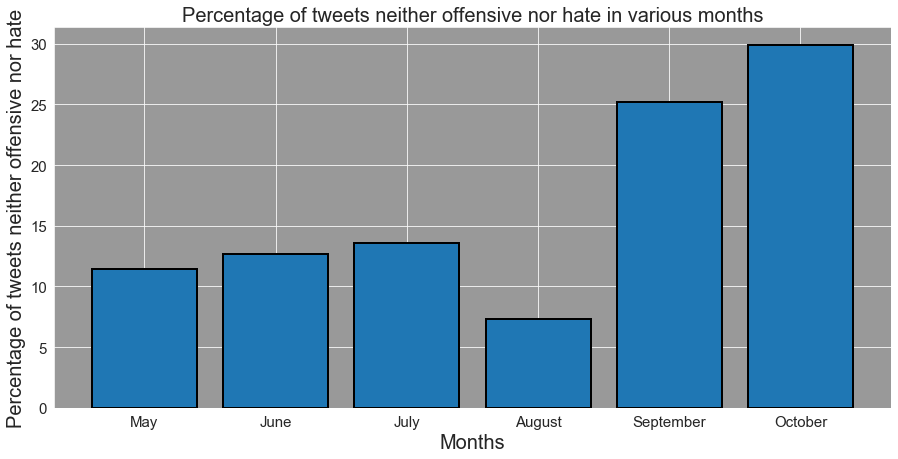

In [13]:

xi=['May','June',"July",'August','September','October']

#for i in pero.index:
   # xi.append(i)
yn=[]

for i in pern:
    yn.append(i)
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(xi, yn, edgecolor = 'black', linewidth=2)

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Percentage of tweets neither offensive nor hate',fontsize=20)
ax.set_title("Percentage of tweets neither offensive nor hate in various months",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    

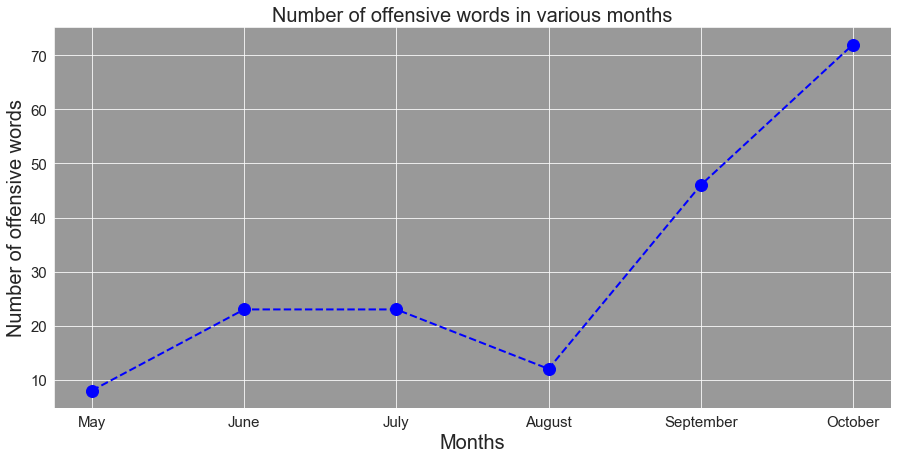

In [14]:

x=[]

for i in o['classofspeech'].index:
    x.append(i)
y=[]

for i in o['classofspeech']:
    y.append(i)
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, y,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Number of offensive words',fontsize=20)
ax.set_title("Number of offensive words in various months",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    

In [15]:
from textblob import TextBlob
x=d1['text']
senti=[]
for i in x:
    senti.append(TextBlob(i).sentiment[0])
    #print (TextBlob(i).sentiment[0])
d1['senscores']=senti    
d1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,...,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,classofspeech,month,senscores
0,0,1703,1703,Rhiskiboi91,RÃÂÃÂ­an ÃÂÃÂ' Catharnaigh ÃÂ°ÃÂÃÂ...,333098431,1139278652401770496,/Rhiskiboi91/status/1139278652401770496,2019-06-13 21:09:32,1560460172,...,2,0,0,False,True,1.139135e+18,"[{'screen_name': 'ainefromderry', 'user_id': '...",neither,6,0.467273
1,1,5449,5449,eliesian,Iain Lees,769802145726132224,1174627552964546562,/eliesian/status/1174627552964546562,2019-09-19 10:13:26,1568888006,...,0,0,0,False,False,NaN,[],neither,9,0.000000
2,2,5058,5058,Theatremusing,Theatremusings,719706176649342977,1154373272403927040,/Theatremusing/status/1154373272403927040,2019-07-25 12:50:10,1564059010,...,0,0,0,False,False,NaN,[],neither,7,0.000000
3,3,1149,1149,dianas_house,Diane House Woodcock,22316199,1123989924431257602,/dianas_house/status/1123989924431257602,2019-05-02 16:37:35,1556815055,...,0,1,0,False,False,NaN,[],neither,5,0.250000
4,4,432,432,PennoftheNth,penny,1072947262781882368,1156793825567920128,/PennoftheNth/status/1156793825567920128,2019-08-01 05:08:34,1564636114,...,0,0,0,False,False,NaN,[],neither,8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,2496,1113,1113,Chester66666666,ChesterCharlie6 Red #FBPE,1399929349,1125282960469630976,/Chester66666666/status/1125282960469630976,2019-05-06 06:15:39,1557123339,...,1,1,0,False,True,1.125045e+18,"[{'screen_name': 'lazaroumterror', 'user_id': ...",neither,5,0.000000
2497,2497,3340,3340,oliviawood0706,hopeinthefuture,1853730362,1189662771228659712,/oliviawood0706/status/1189662771228659712,2019-10-30 21:58:02,1572472682,...,0,0,0,False,True,1.189638e+18,"[{'screen_name': 'BrexitBetrayed', 'user_id': ...",neither,10,0.100000
2498,2498,1552,1552,Tonyhd16,Tonyhd,1070714172726501377,1131232280905691136,/Tonyhd16/status/1131232280905691136,2019-05-22 16:16:07,1558541767,...,1,0,0,False,True,1.131231e+18,"[{'screen_name': 'bbclaurak', 'user_id': '6118...",neither,5,0.000000
2499,2499,5337,5337,craftybookworm,Nicola ÃÂ¢ÃÂÃÂ,30026482,1175890233046568960,/craftybookworm/status/1175890233046568960,2019-09-22 21:50:53,1569189053,...,1,0,0,False,False,NaN,[],offensive_language,9,0.033333


In [16]:
len(d1)

2501

In [17]:
b=d1.groupby('month',sort=True)['senscores'].mean()
b

month
5     0.041107
6     0.041990
7     0.058630
8     0.043275
9     0.065788
10    0.027533
Name: senscores, dtype: float64

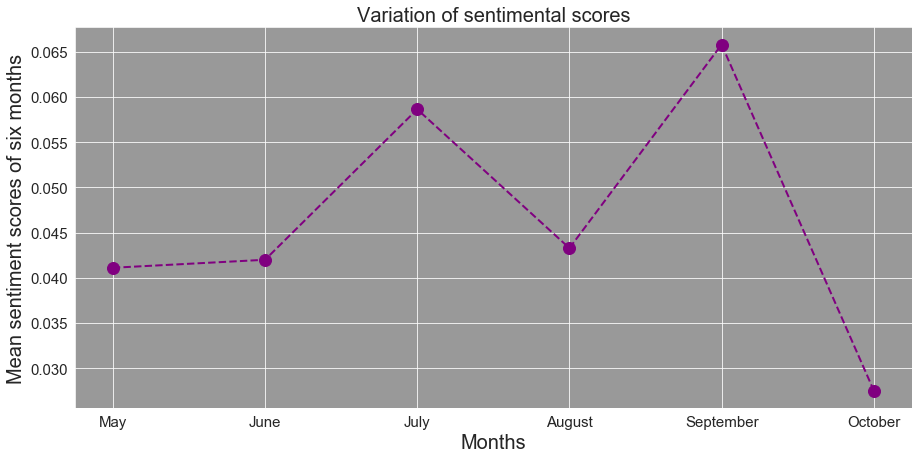

In [18]:


ys=[]

for i in b:
    ys.append(i)
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, ys,color='purple', marker='o', linestyle='dashed',linewidth=2, markersize=12)

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Mean sentiment scores of six months',fontsize=20)
ax.set_title("Variation of sentimental scores",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    

In [19]:
s = pd.Series(ys)
s=s*100
s

0    4.110679
1    4.198996
2    5.863016
3    4.327539
4    6.578840
5    2.753329
dtype: float64

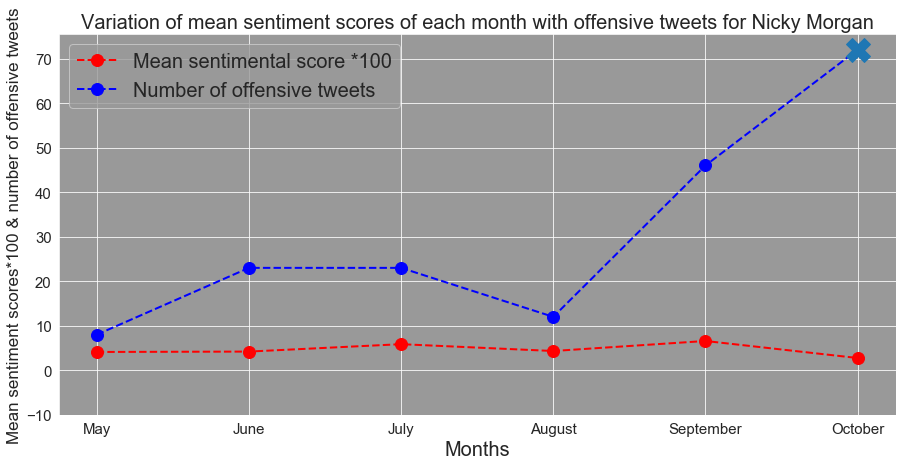

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, s,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Mean sentimental score *100")#
ax.plot(xi, y,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of offensive tweets")
plt.plot('October',72, markersize=24,marker='X')
plt.yticks([-10,0,10,20,30,40,50,60,70])

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Mean sentiment scores*100 & number of offensive tweets',fontsize=17)
ax.set_title("Variation of mean sentiment scores of each month with offensive tweets for Nicky Morgan",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

NameError: name 'perh1' is not defined

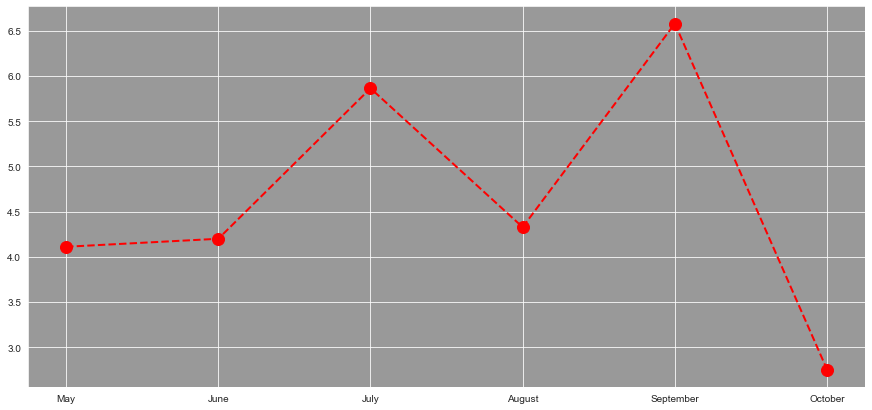

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, s,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Mean sentimental score *100")#
ax.plot(xi, perh1,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Percentage of hate speech")

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Mean sentiment scores and % of hate speeches',fontsize=17)
ax.set_title("Variation of mean sentimental scores with % of hate speech for each month",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

In [ ]:
b1z=d1.groupby('month',sort=True)['classofspeech'].count()
b1z

In [ ]:
d1['classofspeech'].unique()

In [ ]:
o=d1[d1['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o

In [ ]:
b1z=d1.groupby('month',sort=True)['classofspeech'].count()
b1z

In [ ]:
o2=d1[d1['classofspeech']=='hate_speech'].groupby('month',sort=True).count()
o2

In [ ]:
o=d1[d1['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o

In [ ]:
sum(o['classofspeech'])

In [ ]:
pero=[]
for i in o['classofspeech']:
    ans=i*100/sum(o['classofspeech'])
    #print (ans)
    pero.append(ans)
pero


In [ ]:

xi=['February','March','April','May','June',"July",'August']

#for i in pero.index:
   # xi.append(i)
yi=[]

for i in pero:
    yi.append(i)
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(xi, yi, edgecolor = 'black', linewidth=2)

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Percentage of offensive speech',fontsize=20)
ax.set_title("Percentage of offensive speech in various months",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, pero,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Caroline Spelman")

ax.plot(x1, y1,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Mark Lancaster")#

ax.set_xlabel('Months',fontsize=20)
plt.plot('September',36.170212765957444, markersize=24,marker='X')
plt.plot('November',60, markersize=24,marker='X')

ax.set_ylabel('% of offensive words',fontsize=17)
ax.set_title("Variation in offensive words where X denotes refrain or resignation",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

In [ ]:
pero

In [ ]:
df=pd.read_csv("input2_threat_tom.csv")
df

In [ ]:
o3=df[df['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o3

In [ ]:
o33=df[df['classofspeech']=='hate_speech'].groupby('month',sort=True).count()
o33

In [ ]:
sum(o3['classofspeech'])

In [ ]:
pero3=[]
for i in o3['classofspeech']:
    ans=i*100/sum(o3['classofspeech'])
    #print (ans)
    pero3.append(ans)
pero3


In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, pero,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Caroline Spelman")

ax.plot(x1, y1,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Mark Lancaster")#
ax.plot(x1, pero3,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Tom Watson")#

ax.set_xlabel('Months',fontsize=20)
plt.plot('September',36.170212765957444, markersize=24,marker='X')
plt.plot('November',60, markersize=24,marker='X')
plt.plot('November',20.73170731707317, markersize=24,marker='X')

ax.set_ylabel('% of offensive words',fontsize=17)
ax.set_title("Variation in offensive tweets where X denotes refrain or resignation",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

In [ ]:
dff=pd.read_csv("input2_threat_Allen.csv")
dff

In [ ]:
o4=dff[dff['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o4

In [ ]:
sum(o3['classofspeech'])

In [ ]:
pero4=[]
for i in o4['classofspeech']:
    ans=i*100/sum(o4['classofspeech'])
    #print (ans)
    pero4.append(ans)
pero4


In [ ]:
peero4=[2.272727272727273,
 19.318181818181817,
 9.090909090909092,
 10.227272727272727,43.18181818181818,
 15.909090909090908]
x4=["September 2018",'October 2018','November 2018','December 2018','January 2018','February 2018']

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x4, peero4,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Heidi Allen")


ax.set_xlabel('Months',fontsize=20)

plt.plot('February',15.909090909090908, markersize=24,marker='X')
plt.yticks([0,10,20,30,40,50,60])
ax.set_ylabel('% of offensive words',fontsize=17)
ax.set_title("Variation in offensive words where X denotes refrain or resignation",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".5"})

d1=pd.read_csv("input2_threat.csv",encoding="latin1")
d1

In [ ]:
b1z=d1.groupby('month',sort=True)['classofspeech'].count()
b1z

In [ ]:
d1['classofspeech'].unique()

In [ ]:
o=d1[d1['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o

In [2]:
sum(o['classofspeech'])

NameError: name 'o' is not defined

In [3]:
import requests
x=d1['text']
no_neg=[]
no_pos=[]
for i in x:
    response=requests.get(f'http://104.248.174.180/article_stats/?query={i}')
    #print(response.json())
    jsonobj=response.json()
    if response.status_code==200:
      #print (jsonobj['number_negative_words'])
      no_neg.append(jsonobj['number_negative_words'])
      print (jsonobj['number_positive_words'])
      no_pos.append(jsonobj['number_positive_words'])
    else:     

      no_neg.append(0)
      #print (jsonobj['number_of_words'])
      no_pos.append(0)

ConnectionError: HTTPConnectionPool(host='104.248.174.180', port=80): Max retries exceeded with url: /article_stats/?query=I'm%20glad%20she%20found%20the%20time%20to%20do%20one%20of%20BOJO!%20Aye%20of%20course%20with%20the%20new%20Wain%20and%20Wains%20when%20your%20good%20and%20ready%20%C3%83%C2%83%C3%82%C2%83%C3%83%C2%82%C3%82%C2%81ine!%20Also%20can%20i%20make%20a%20request%20ad%20Nicky%20Morgan%20to%20the%20list%20that%20would%20be%20hilarious%20also!%20 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000025FDBE6A548>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".6"})

df=pd.read_csv("negpos Nickymorgan.csv",encoding="latin1")
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,screen_name,username,user_id,tweet_id,tweet_url,timestamp,...,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,classofspeech,month,negativewords,positivewords
0,0,0,1703,1703,Rhiskiboi91,RÃÂÃÂ­an ÃÂÃÂ' Catharnaigh ÃÂ°ÃÂÃÂ...,333098431,1139278652401770496,/Rhiskiboi91/status/1139278652401770496,2019-06-13 21:09:32,...,0,0,False,True,1.139135e+18,"[{'screen_name': 'ainefromderry', 'user_id': '...",neither,6,0,5
1,1,1,5449,5449,eliesian,Iain Lees,769802145726132224,1174627552964546562,/eliesian/status/1174627552964546562,2019-09-19 10:13:26,...,0,0,False,False,NaN,[],neither,9,0,0
2,2,2,5058,5058,Theatremusing,Theatremusings,719706176649342977,1154373272403927040,/Theatremusing/status/1154373272403927040,2019-07-25 12:50:10,...,0,0,False,False,NaN,[],neither,7,0,0
3,3,3,1149,1149,dianas_house,Diane House Woodcock,22316199,1123989924431257602,/dianas_house/status/1123989924431257602,2019-05-02 16:37:35,...,1,0,False,False,NaN,[],neither,5,0,1
4,4,4,432,432,PennoftheNth,penny,1072947262781882368,1156793825567920128,/PennoftheNth/status/1156793825567920128,2019-08-01 05:08:34,...,0,0,False,False,NaN,[],neither,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,2496,2496,1113,1113,Chester66666666,ChesterCharlie6 Red #FBPE,1399929349,1125282960469630976,/Chester66666666/status/1125282960469630976,2019-05-06 06:15:39,...,1,0,False,True,1.125045e+18,"[{'screen_name': 'lazaroumterror', 'user_id': ...",neither,5,0,0
2497,2497,2497,3340,3340,oliviawood0706,hopeinthefuture,1853730362,1189662771228659712,/oliviawood0706/status/1189662771228659712,2019-10-30 21:58:02,...,0,0,False,True,1.189638e+18,"[{'screen_name': 'BrexitBetrayed', 'user_id': ...",neither,10,0,1
2498,2498,2498,1552,1552,Tonyhd16,Tonyhd,1070714172726501377,1131232280905691136,/Tonyhd16/status/1131232280905691136,2019-05-22 16:16:07,...,0,0,False,True,1.131231e+18,"[{'screen_name': 'bbclaurak', 'user_id': '6118...",neither,5,0,0
2499,2499,2499,5337,5337,craftybookworm,Nicola ÃÂ¢ÃÂÃÂ,30026482,1175890233046568960,/craftybookworm/status/1175890233046568960,2019-09-22 21:50:53,...,0,0,False,False,NaN,[],offensive_language,9,2,1


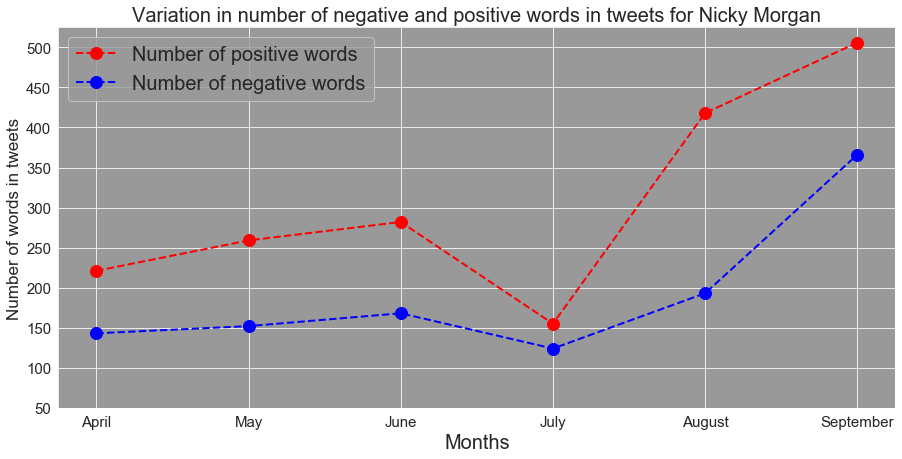

In [9]:
xi=['April','May','June','July','August','September']
kplus=df.groupby('month',sort=True)['positivewords'].sum()
plus=[]
for i in kplus:
    plus.append(i)
plus    
kneg=df.groupby('month',sort=True)['negativewords'].sum()
neg=[]
for i in kneg:
    neg.append(i)
    
neg
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, plus,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of positive words")#
ax.plot(xi, neg,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of negative words")
plt.yticks([50,100,150,200,250,300,350,400,450,500])
ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Number of words in tweets',fontsize=17)
ax.set_title("Variation in number of negative and positive words in tweets for Nicky Morgan",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

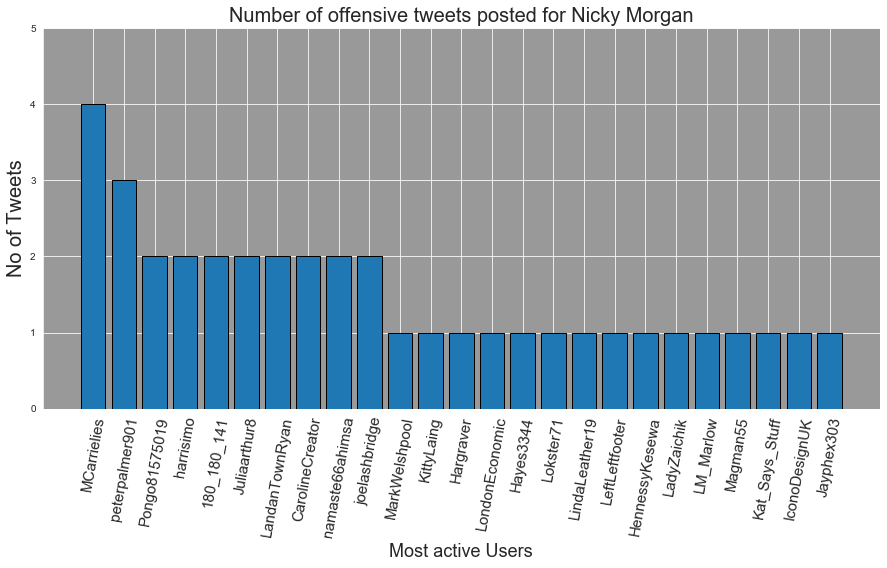

In [12]:
o10=d1[d1['classofspeech']=='offensive_language']
o10
usertweets = o10.groupby('screen_name')
#Taking the top 25 tweeting users
top_users = usertweets.count()['text'].sort_values(ascending = False)[:25]
top_users_dict = top_users.to_dict()
user_ordered_dict =sorted(top_users_dict.items(), key=lambda x:x[1])
user_ordered_dict = user_ordered_dict[::-1]
#Now, like in the previous hashtags and mention cases, going to make #two lists, one with the username and one with the value
dict_values = []
dict_keys = []
for item in user_ordered_dict[0:25]:
    dict_keys.append(item[0])
    dict_values.append(item[1])
    fig = plt.figure(figsize = (15,7))
index = np.arange(25)
plt.bar(index, dict_values, edgecolor = 'black', linewidth=1)
plt.xlabel('Most active Users', fontsize = 18)
plt.yticks([0,1,2,3,4,5])
plt.ylabel('No of Tweets', fontsize=20)
plt.xticks(index,dict_keys, fontsize=15, rotation=80)
plt.title('Number of offensive tweets posted for Nicky Morgan', fontsize = 20)
plt.show()

In [13]:
o2=d1[d1['classofspeech']=='offensive_language']
len(o2)

184

In [17]:
oh=d1[d1['classofspeech']=='hate_speech']
len(oh)

0